In [58]:
import alpaca_trade_api as alpaca
from dotenv import load_dotenv
import os
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
import datetime as dt
import statistics
from sklearn.linear_model import LinearRegression

In [59]:
# initialize API from API keys in .env
load_dotenv()
api_key = os.environ['APCA-API-KEY-ID']
api_secret_key = os.environ['APCA-API-SECRET-KEY']
api_base_url = 'https://paper-api.alpaca.markets'
api = alpaca.REST(api_key, api_secret_key, api_base_url)

In [ ]:
bars = api.get_bars("MSFT", alpaca.TimeFrame.Day, '2020-01-01', adjustment='split').df
QQQ_bars = api.get_bars("SPY", alpaca.TimeFrame.Day, '2020-01-01', adjustment='split').df
bars['change'] = bars['close'].diff()
QQQ_bars['change'] = QQQ_bars['close'].diff()
bars['percent change'] = bars['change'] / bars['close'] * 100
QQQ_bars['percent change'] = QQQ_bars['change'] / QQQ_bars['close'] * 100
bars = bars.dropna()
QQQ_bars = QQQ_bars.dropna()
display(bars.head(10))
display(bars.tail(10))
display(QQQ_bars.head(10))
display(QQQ_bars.tail(10))
print(len(bars))
print(len(QQQ_bars))

,close,high,low,trade_count,open,volume,vwap,change,percent change
timestamp,,,,,,,,,
2024-09-04 04:00:00+00:00,25.75,25.95,24.87,6303,25.05,1206657,25.36,0.00,0.000000
2024-09-05 04:00:00+00:00,24.85,25.40,24.70,8579,25.10,2048347,25.05,-0.90,-3.621730
2024-09-06 04:00:00+00:00,23.75,25.20,23.60,8186,25.10,2004282,24.22,-1.10,-4.631579
2024-09-09 04:00:00+00:00,25.35,25.38,24.28,7794,24.55,1452846,24.68,1.60,6.311637
2024-09-10 04:00:00+00:00,25.70,25.75,25.05,5406,25.25,1227192,25.27,0.35,1.361868
2024-09-11 04:00:00+00:00,25.55,25.75,24.61,4754,25.25,1503944,25.19,-0.15,-0.587084
2024-09-12 04:00:00+00:00,25.85,25.98,25.40,4339,25.55,1002514,25.69,0.30,1.160542
2024-09-13 04:00:00+00:00,26.50,26.65,25.55,6362,25.60,1410399,26.21,0.65,2.452830
2024-09-16 04:00:00+00:00,25.70,26.00,25.50,4871,26.00,1210080,25.70,-0.80,-3.112840


,close,high,low,trade_count,open,volume,vwap,change,percent change
timestamp,,,,,,,,,
2025-01-28 05:00:00+00:00,44.8700,45.9900,44.8300,6368,45.47,752725,45.440840,-0.0500,-0.111433
2025-01-29 05:00:00+00:00,46.2300,46.4897,44.9200,5423,45.29,909442,45.566186,1.3600,2.941813
2025-01-30 05:00:00+00:00,46.5400,47.2300,46.4312,6462,46.52,729622,46.787530,0.3100,0.666094
2025-01-31 05:00:00+00:00,45.0100,47.0300,44.9600,10176,46.44,1285560,45.771798,-1.5300,-3.399245
2025-02-03 05:00:00+00:00,44.8600,45.2800,41.8605,16199,42.00,2447110,43.694630,-0.1500,-0.334374
2025-02-04 05:00:00+00:00,43.7700,44.7250,43.4500,9673,44.03,1355136,44.045717,-1.0900,-2.490290
2025-02-05 05:00:00+00:00,43.1400,43.9698,42.7733,6709,43.77,789331,43.349891,-0.6300,-1.460362
2025-02-06 05:00:00+00:00,42.9600,43.8700,42.4100,6772,43.59,862772,42.963037,-0.1800,-0.418994
2025-02-07 05:00:00+00:00,42.4200,44.4400,42.3800,6915,44.21,978748,43.523116,-0.5400,-1.272984


,close,high,low,trade_count,open,volume,vwap,change,percent change
timestamp,,,,,,,,,
2024-09-04 04:00:00+00:00,550.95,554.4300,549.460,510879,550.20,47224939,551.570698,-1.13,-0.205100
2024-09-05 04:00:00+00:00,549.61,553.7995,547.100,501683,550.89,44264258,549.838735,-1.34,-0.243809
2024-09-06 04:00:00+00:00,540.36,551.6000,539.440,673258,549.94,68493805,542.599443,-9.25,-1.711822
2024-09-09 04:00:00+00:00,546.41,547.7100,542.680,458651,544.65,40445822,545.526989,6.05,1.107227
2024-09-10 04:00:00+00:00,548.79,549.1500,543.380,410778,548.36,36394579,547.136011,2.38,0.433681
2024-09-11 04:00:00+00:00,554.42,555.3600,539.960,646260,548.70,75248608,547.841231,5.63,1.015476
2024-09-12 04:00:00+00:00,559.09,559.4000,552.740,478029,555.01,51892735,557.019399,4.67,0.835286
2024-09-13 04:00:00+00:00,562.01,563.0300,559.450,400749,559.71,39310501,561.691649,2.92,0.519564
2024-09-16 04:00:00+00:00,562.84,563.1100,559.900,360839,561.74,36656122,561.758655,0.83,0.147466


,close,high,low,trade_count,open,volume,vwap,change,percent change
timestamp,,,,,,,,,
2025-01-28 05:00:00+00:00,604.52,605.3700,597.250,419856,600.62,44433322,602.917730,5.15,0.851916
2025-01-29 05:00:00+00:00,601.81,604.1300,599.220,426224,603.72,37177429,601.975438,-2.71,-0.450308
2025-01-30 05:00:00+00:00,605.04,606.6000,600.715,419933,603.96,39281255,604.043298,3.23,0.533849
2025-01-31 05:00:00+00:00,601.82,609.9600,601.050,591698,607.50,66671471,604.912328,-3.22,-0.535044
2025-02-03 05:00:00+00:00,597.77,600.2900,590.490,730460,592.67,65713364,596.422957,-4.05,-0.677518
2025-02-04 05:00:00+00:00,601.78,602.3000,597.280,377667,597.83,33024773,600.835606,4.01,0.666356
2025-02-05 05:00:00+00:00,604.22,604.3700,598.580,358145,600.64,30653149,602.220255,2.44,0.403826
2025-02-06 05:00:00+00:00,606.32,606.4525,602.630,351828,605.99,35771503,605.227961,2.10,0.346352
2025-02-07 05:00:00+00:00,600.77,608.1300,600.050,554348,606.89,50188662,602.782187,-5.55,-0.923814


109
109


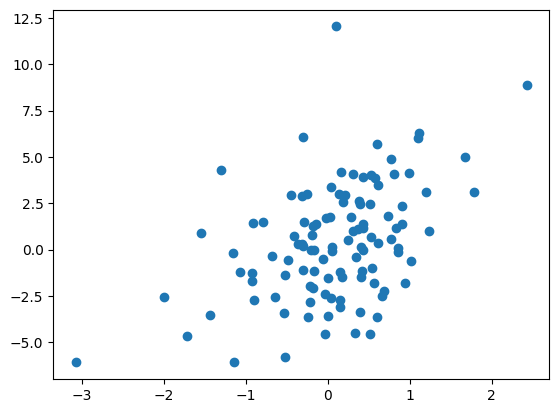

In [61]:
plt.scatter(QQQ_bars['percent change'], bars['percent change'])

In [62]:

# Assuming df1 and df2 are your dataframes and 'col1' and 'col2' are the columns
x = QQQ_bars['percent change'].values.reshape(-1, 1)  # Independent variable (reshape for 2D array)
y = bars['percent change'].values  # Dependent variable

# Initialize the linear regression model
model = LinearRegression()

# Fit the model
model.fit(x, y)

# Get the slope (coefficient) and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Optionally, you can get the R^2 value to evaluate the model
r_squared = model.score(x, y)
print(f"R-squared: {r_squared}")

Slope: 1.7835308055631323
Intercept: 0.27977573101048947
R-squared: 0.2001524887825783


count    109.000000
mean       0.424585
std        3.125480
min       -6.083294
25%       -1.700680
50%        0.280702
75%        2.452830
max       12.031048
Name: percent change, dtype: float64


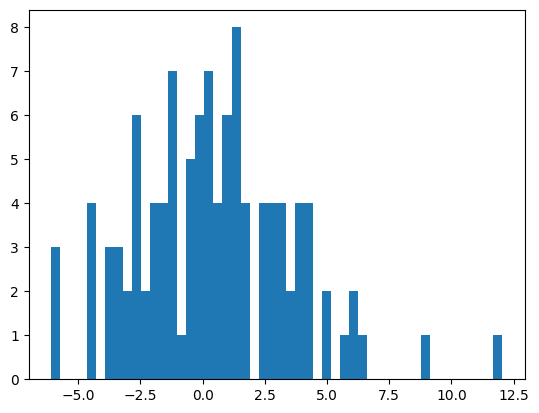

count    109.000000
mean       0.081192
std        0.784001
min       -3.071911
25%       -0.297471
50%        0.147466
75%        0.542845
max        2.426232
Name: percent change, dtype: float64


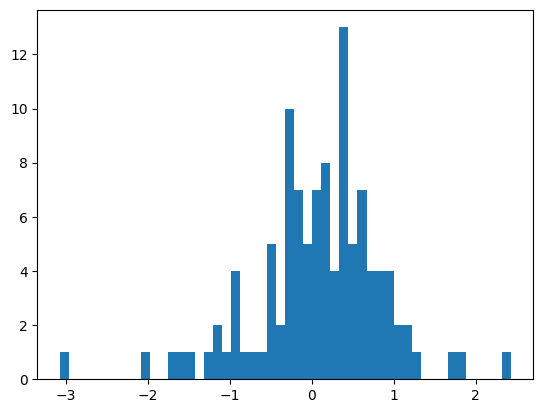

<Figure size 640x480 with 0 Axes>

In [63]:
print(bars['percent change'].describe())
plt.hist(bars['percent change'], bins=50)
plt.show()
plt.clf()
print(QQQ_bars['percent change'].describe())
plt.hist(QQQ_bars['percent change'], bins=50)
plt.show()
plt.clf()

In [64]:
std_ratio = bars['percent change'].describe()['std'] / QQQ_bars['percent change'].describe()['std']
std_ratio
print(f"${5000 / std_ratio}")

$1254.2089244040085
